## Geospatial Analysis I: global, zonal and focal operations, map algebra
Resources:

* [
GRASS GIS overview and manual](http://grass.osgeo.org/grass74/manuals/index.html)
*  [Recommendations](data_acquisition.html#commands)
and [tutorial](./grass_intro.html)
how to use GUI from the first assignment




To run _r.mapcalc_ expressions, you can either
run the entire command in the GUI _Console_, or in case of any
problems, type or copy the expression (without the _r.mapcalc_) in the GRASS GIS Raster Map Calculator
which can be launched from _Layer Manager_ toolbar.


Text files with color rules:


* [srtmneddiff_color.txt](data/srtmneddiff_color.txt)


### Start GRASS GIS
In startup pannel set GIS Data Directory to path to datasets,
for example on MS Windows, `C:\Users\myname\grassdata`.
For Project location select nc_spm_08_grass7 (North Carolina, State Plane, meters) and
for Accessible mapset create a new mapset (called e.g. HW_map_algebra) and
click Start GRASS.

In [1]:
# using Python to initialize GRASS GIS
# This is a quick introduction into Jupyter Notebook.
# Python code can be executed like this:
a = 6
b = 7
c = a * b
print "Answer is", c
# Python code can be mixed with command line code (Bash).
# It is enough just to prefix the command line with an exclamation mark:
!echo "Answer is $c"
# Use Shift+Enter to execute this cell. The result is below.

Answer is 42
Answer is 42


In [35]:
# using Python to initialize GRASS GIS
import os
import sys
import subprocess
from IPython.display import Image

# create GRASS GIS runtime environment
gisbase = subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# do GRASS GIS imports
import grass.script as gs
import grass.script.setup as gsetup

# set GRASS GIS session data
rcfile = gsetup.init(gisbase, "/home/jovyan/grassdata", "nc_spm_08_grass7", "user1")

In [36]:
# using Python to initialize GRASS GIS
# default font displays
os.environ['GRASS_FONT'] = 'sans'
# overwrite existing maps
os.environ['GRASS_OVERWRITE'] = '1'
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)

True

In [37]:
# using Python to initialize GRASS GIS
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

Change working directory:
_Settings_ > _GRASS working environment_ > _Change working directory_ > select/create any directory
or type `cd` (stands for change directory) into the GUI
_Console_ and hit Enter:

In [38]:
# a proper directory is already set, download files
import urllib
urllib.urlretrieve("http://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/srtmneddiff_color.txt", "srtmneddiff_color.txt")
urllib.urlretrieve("http://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/srtmneddiff_color.txt", "srtmneddiff_color.txt")

('srtmneddiff_color.txt', <httplib.HTTPMessage instance at 0x7fa7e3d48290>)

Download all text files with color rules (see above)
to the selected directory. Now you can use the commands from the assignment requiring the text file
without the need to specify the full path to the file.

### Compute summaries

Compute areas for each category at two different resolutions.

Are results equal? Explain in detail why (see also Lecture 1).
Copy and paste the report from the output window or
save the report in a text file: _Output window_ > _Save_.
Use fixed width font (e.g., Courier, Andale Mono  in your report to preserve formatting).

In [39]:
!g.region raster=landuse96_28m res=12 -ap
!r.report landuse96_28m unit=c,h,p
!g.region raster=landuse96_28m res=30 -ap
!r.report landuse96_28m unit=c,h,p

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228528
south:      215016
west:       629976
east:       644976
nsres:      12
ewres:      12
rows:       1126
cols:       1250
cells:      1407500
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Mon Jan  7 21:06:46 2019|
|-----------------------------------------------------------------------------|
|          north: 228528    east: 644976                                      |
|REGION    south: 215016    west: 629976                                      |
|          res:       12    res:      12                                      |
|-------------------

Compute areas for each category of land use for each zipcode.
Compare 27601 Raleigh with 27511 Cary.
Include only the relevant part of the table in your report.

In [40]:
!r.report zipcodes,landuse96_28m unit=h,p

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Mon Jan  7 21:06:57 2019|
|-----------------------------------------------------------------------------|
|          north: 228540    east: 645000                                      |
|REGION    south: 215010    west: 629970                                      |
|          res:       30    res:      30                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAPS: South West Wake: Zipcode areas derived from vector m

Compute zonal statistics maps representing
average slope for each basin.
Add legends using _Add map elements_ in Map Display toolbar.
Reminder: _d.out.file_ means Save to graphics file for your report.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000
First pass
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output map
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <slope_avgbasin> set to 'gyr'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
d.vect complete.


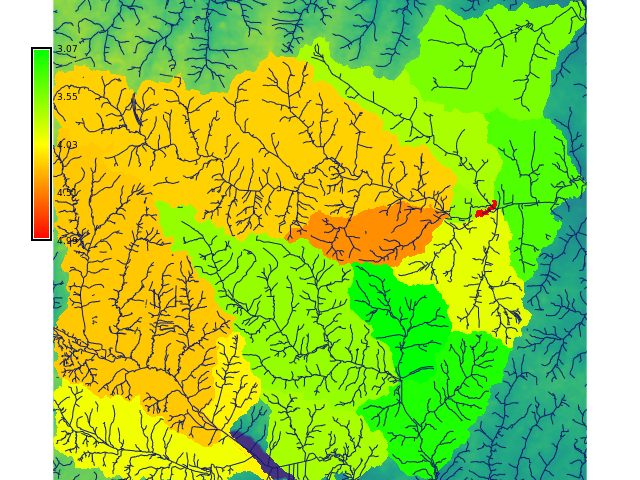

In [41]:
!g.region raster=slope -p
!r.stats.zonal base=basin_50K cover=slope method=average output=slope_avgbasin
!r.colors slope_avgbasin color=gyr
!d.rast slope_avgbasin
!d.legend slope_avgbasin at=90,50,5,8
!d.vect streams color=15:25:110
Image(filename="map.png")

Compute zonal statistics maps representing most common land use for each basin.
To get the best result, make sure you use all the flags from the example
below.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
d.vect complete.


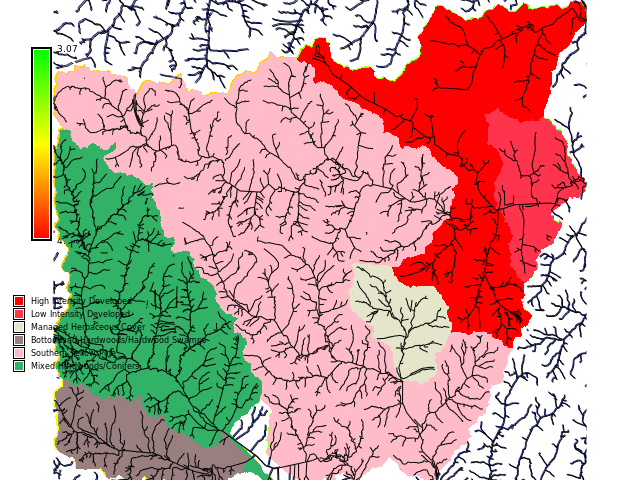

In [9]:
!g.region raster=landuse96_28m -p
!r.mode base=basin_50K cover=landuse96_28m output=landuse96_modebasin
!d.rast landuse96_modebasin
!d.vect streams
!d.legend landuse96_modebasin at=40,20,2,5 -n -f -c
Image(filename="map.png")

### Apply neighborhood operators

Use neighborhood operator to compute land use diversity map.
How diverse is land use in NCSU area based on the following calculation?
Explore how different sizes of the neighborhood used alter the results and why?
Before you start to display the new results,
remove all previously added map layers from the _Layer Manager_.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324
north=228527.25
south=215018.25
east=644971
west=629980
nsres=28.5
ewres=28.5
rows=474
cols=526
cells=249324
datatype=CELL
ncats=24
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
d.vect complete.
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT          

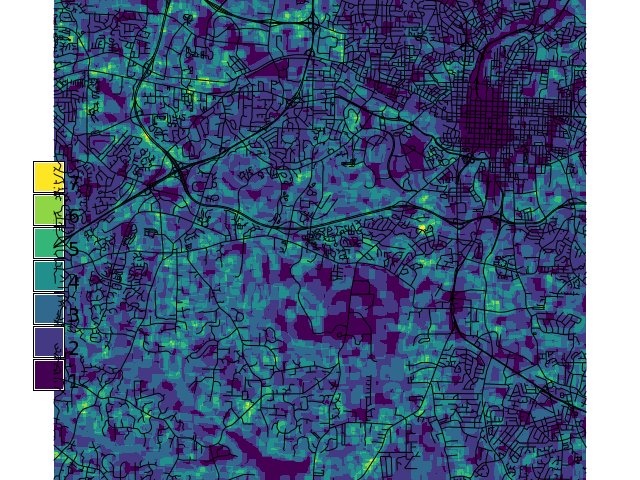

In [10]:
!g.region raster=landuse96_28m -p
!r.info -g landuse96_28m
!r.neighbors landuse96_28m output=lu_divers method=diversity size=7
!d.erase
!d.rast lu_divers
!d.legend lu_divers at=70,15,5,10 -v
!d.vect streets_wake
!r.report lu_divers unit=p
Image(filename="map.png")

Use neighborhood operator to smooth the SRTM elevation map and 
compare the global statistical measures for the original and smoothed DEM.
How does the size of the neighborhood influence the result?
(You can test different sizes yourself.)

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: -32.6544
maximum: 189.818
range: 222

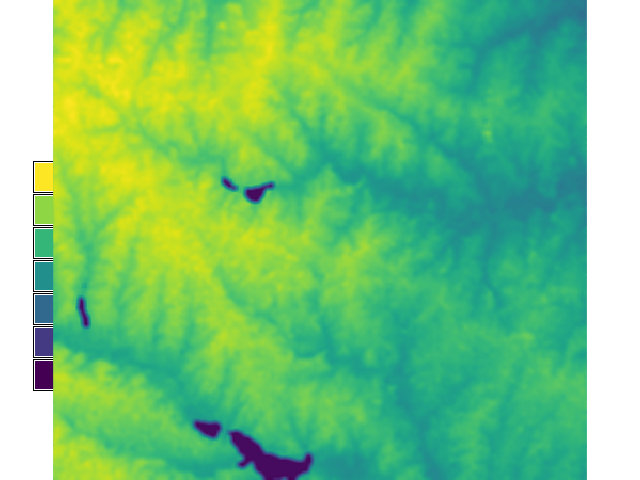

In [11]:
!g.region raster=elev_srtm_30m -p
!r.neighbors elev_srtm_30m output=elev_srtm30m_sm5 method=average size=5
!d.rast elev_srtm_30m
!d.rast elev_srtm30m_sm5
!r.univar elev_srtm_30m
!r.univar elev_srtm30m_sm5
Image(filename="map.png")

### Patch multiple raster layers into a single raster

Patch raster tiles for lidar based, 6m res. DEM for Centennial Campus.

Before displaying new data, remove older map layers from _Layer Manager_.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      225552.45109601
south:      219456.439
west:       633985.268
east:       640081.28009601
nsres:      6.0960121
ewres:      6.0960121
rows:       1000
cols:       1000
cells:      1000000
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <elevlidD_6m> set to 'elevation'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


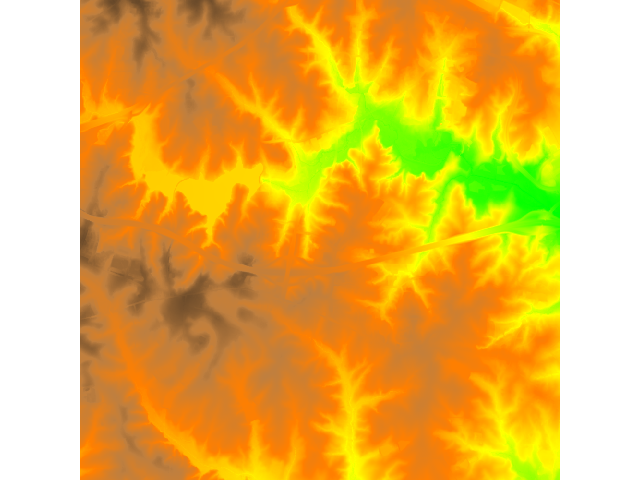

In [12]:
!g.region raster=el_D793_6m,el_D783_6m,el_D782_6m,el_D792_6m -p
!r.patch input=el_D793_6m,el_D783_6m,el_D782_6m,el_D792_6m output=elevlidD_6m
!r.colors elevlidD_6m raster=elevation
!d.erase
!d.rast elevlidD_6m
Image(filename="map.png")

### Map Algebra
See _r.mapcalc_ manual page for syntax and functions.


If you are getting en error when running
_r.mapcalc_ in GUI _Console_ or the system
command line, launch the GUI version from _Layer Manager_
toolbar.

#### NDVI
Compute Normalized Difference Vegetation Index (NDVI).
Explain the difference between floating point and integer
handling in ndvi1, ndvi2 and ndvi3 result.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228513
south:      214975.5
west:       629992.5
east:       645012
nsres:      28.5
ewres:      28.5
rows:       475
cols:       527
cells:      250325
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
min=0
max=0
min=-0.956521739130435
max=0.978723404255319
min=-0.9565217
max=0.9787234
Color table for raster map <ndvi3> set to 'ndvi'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


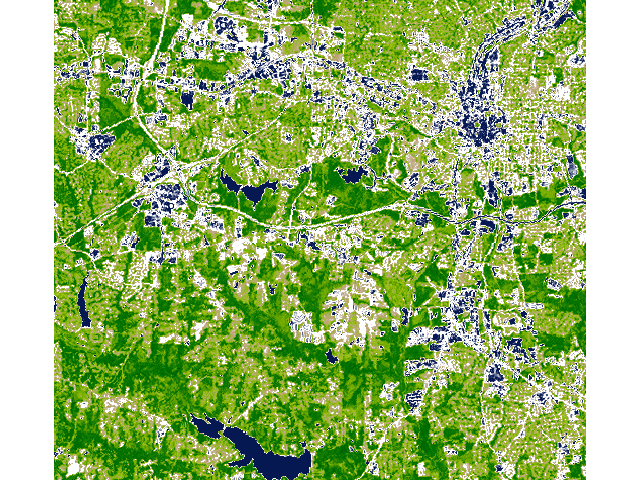

In [13]:
!g.region raster=lsat7_2002_40 -p
!r.mapcalc "ndvi1 = (lsat7_2002_40 - lsat7_2002_30) / (lsat7_2002_40 + lsat7_2002_30)"
!r.mapcalc "ndvi2 = 1.0 * (lsat7_2002_40 - lsat7_2002_30) / (lsat7_2002_40 + lsat7_2002_30)"
!r.mapcalc "ndvi3 = float(lsat7_2002_40 - lsat7_2002_30) / float(lsat7_2002_40 + lsat7_2002_30)"
!r.info -r ndvi1
!r.info -r ndvi2
!r.info -r ndvi3
!r.colors ndvi3 color=ndvi
!d.rast ndvi3
Image(filename="map.png")

Note that this is an example, for computing various vegetation indices
in GRASS GIS, we would use the _i.vi_ module
after performing atmospheric corrections.

#### Difference between DEM and DSM
Explore the difference between the SRTM DSM and lidar-based NED DEM.
Compute the map of elevation differences.

In [14]:
!g.region raster=elev_ned_30m -p
!r.mapcalc "srtm_ned30_dif = elev_srtm_30m - elev_ned_30m"

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


Create a custom color table to distinguish the negative and positive values:

In [15]:
!r.info -r srtm_ned30_dif

min=-142.2435
max=86.19325


fp: Data range is -142.24... to 86.19...
Assign custom color table [srtmneddiff_color.txt](data/srtmneddiff_color.txt).
GUI: Right click on layer > _Properties_ > _Set color table_ > _Colors_ > _Path to rules file_.

In [16]:
!r.colors srtm_ned30_dif rules=srtmneddiff_color.txt

Color table for raster map <srtm_ned30_dif> set to 'srtmneddiff_color.txt'


Zoom to computational region and switch off previous map layers. Display the difference map layer:

ERROR: Variable 'LOCATION_NAME' not set
ERROR: Variable 'LOCATION_NAME' not set
ERROR: Variable 'LOCATION_NAME' not set
ERROR: Variable 'LOCATION_NAME' not set
ERROR: Variable 'LOCATION_NAME' not set


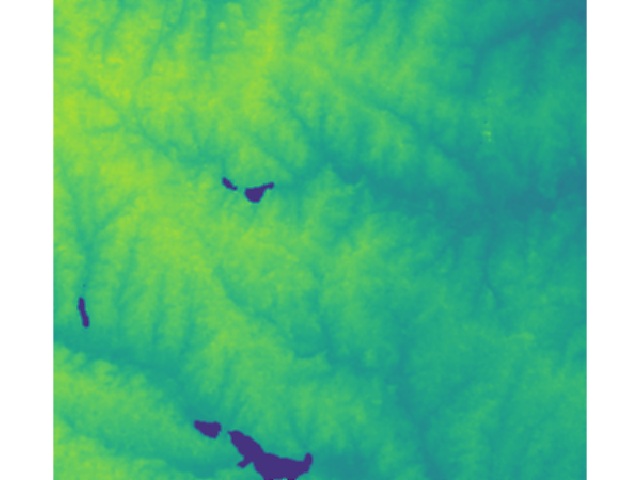

In [34]:
!d.rast srtm_ned30_dif
!d.legend srtm_ned30_dif at=70,15,5,10
!d.vect streets_wake
Image(filename="map.png")
!r.univar elev_srtm_30m
!r.univar elev_ned_30m
Image(filename="map.png")

Is the srtm mostly higher or lower than elev_ned?
Which result will you use to answer the above question -
the srtm_ned30_dif map or numbers provided by _r.univar_?


#### Working with if statements
Create map of urban areas (high density and low density class)
with 0 class elsewhere.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228527.25
south:      215018.25
west:       629980
east:       644971
nsres:      28.5
ewres:      28.5
rows:       474
cols:       526
cells:      249324
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


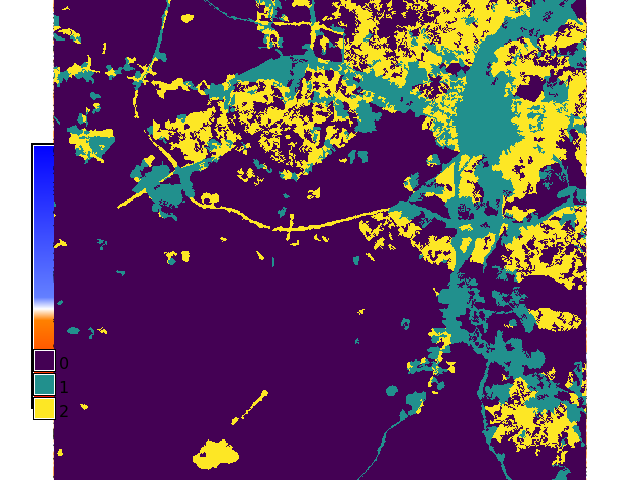

In [18]:
!g.region raster=landuse96_28m -p
!r.mapcalc "urban1_30m = if(landuse96_28m == 1,1,0) + if(landuse96_28m == 2,2,0)"
!d.rast urban1_30m
!d.legend urban1_30m at=10,30,5,8
Image(filename="map.png")

Alternatively with logical 'or' operator and null elsewhere:

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


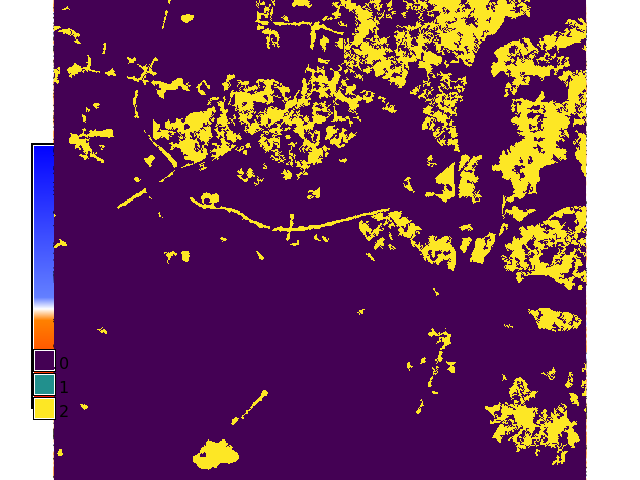

In [19]:
!r.mapcalc "urban2_30m = if(landuse96_28m == 1 || landuse96_28m == 2,landuse96_28m,null())"
!d.rast urban2_30m
Image(filename="map.png")

#### Handling null values





Create mask for low lying developed areas (e.g. vulnerable to flooding)
with elevation between 60 and 100m and land use 1 or 2.
Set the region, display the input maps and create a MASK.
Before you start new computations, remove or switch off previous map layers
in the _Layer Manger_.
You may also zoom to computational region in _Map Display_
once you set a new one.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


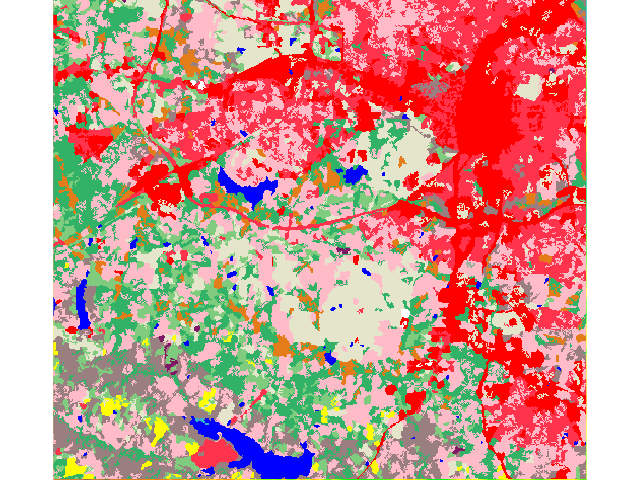

In [20]:
!g.region raster=elevation -p
!d.erase
!d.rast elevation
!d.rast landuse96_28m
!r.mapcalc "low_elev_developed = if((elevation < 100 && elevation > 60) && (landuse96_28m == 1 || landuse96_28m == 2),1,null())"
!r.mask raster=low_elev_developed
Image(filename="map.png")

Command _r.mask_ creates a raster map "MASK" in your mapset.


Remove "low_elev_developed" layer if it was added.
Display watersheds to see the mask effect:

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


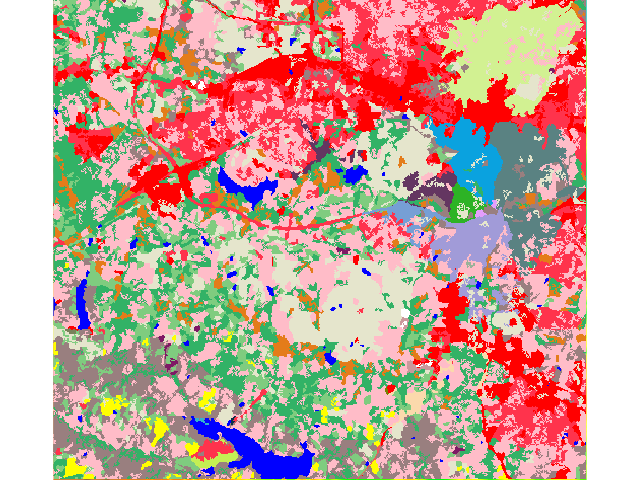

In [21]:
!d.rast basin_50K
Image(filename="map.png")

Disable mask, and display basin_50K again
to show that the mask was removed.

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


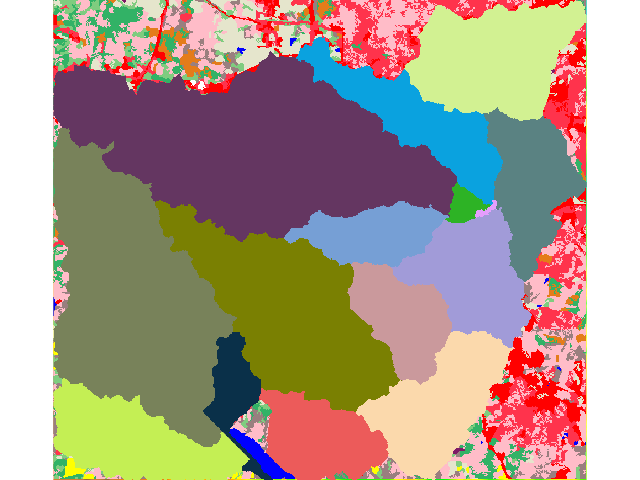

In [22]:
!r.mask -r
!d.rast basin_50K
Image(filename="map.png")

#### Using coordinates of moving window in map algebra

Replace section of SRTM DSM with NED DEM elevation.
Try to explain how this _r.mapcalc_ expression works.

In [23]:
!r.mapcalc "elev_combined = if(y() < 224274. && x() > 637455., elevation, elev_srtm_30m)"

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


### Optional -  various additional useful tasks
#### Tilted plane
Create a raster map representing tilted plane (e.g., geologic fault):

In [24]:
!g.region rural_1m -p
!r.mapcalc "tiltplane = 0.2*(0.1*row()+col())+50"
!r.mapcalc "tiltpl_under = if(tiltplane < elev_lid792_1m + 2,tiltplane,null())"

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


View the elevation surface and subsurface plane in 3D.
_Switch off all layers in the layer manager except for elev_lid792_1m and tiltpl_under_.
Change display to 3D view, adjust viewing position to a view from South.
Save an image for your report.


#### Map subsets
Use map algebra to create map subsets.
Change region to the airphoto tile 792 and resolution 10m.
Since we will work in different area, it is a good idea to remove
all previously used map layers from _Layers_ in
the _Layer Manager_.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      222510
south:      219450
west:       637030
east:       640090
nsres:      10
ewres:      10
rows:       306
cols:       306
cells:      93636
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


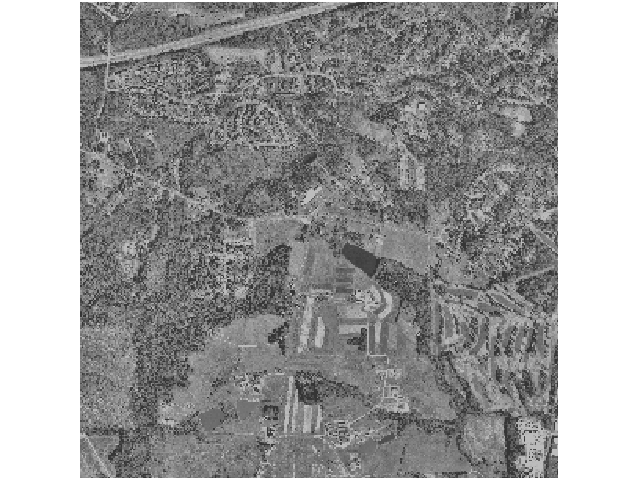

In [25]:
!g.region raster=ortho_2001_t792_1m res=10 -ap
!d.erase
!d.rast ortho_2001_t792_1m
Image(filename="map.png")

Create a subset of the map elevation for this subregion.

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


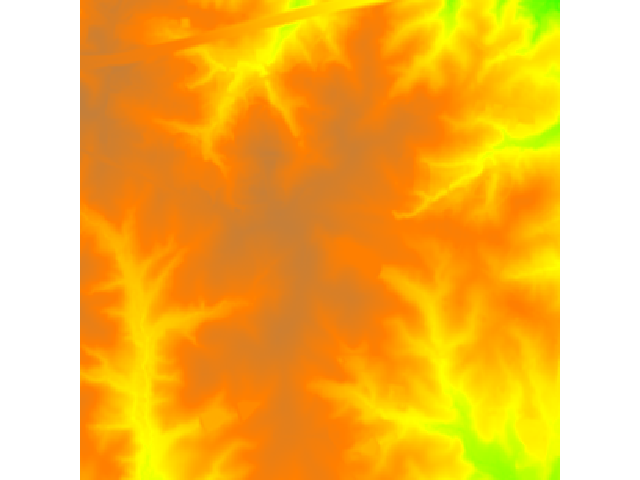

In [26]:
!r.mapcalc "elevation_792_10m = elevation"
!d.rast elevation_792_10m
Image(filename="map.png")

Zoom out to see that it is a subset.

#### Work with NULL and MASK

Set the mask and check its effect.

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
d.vect complete.
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


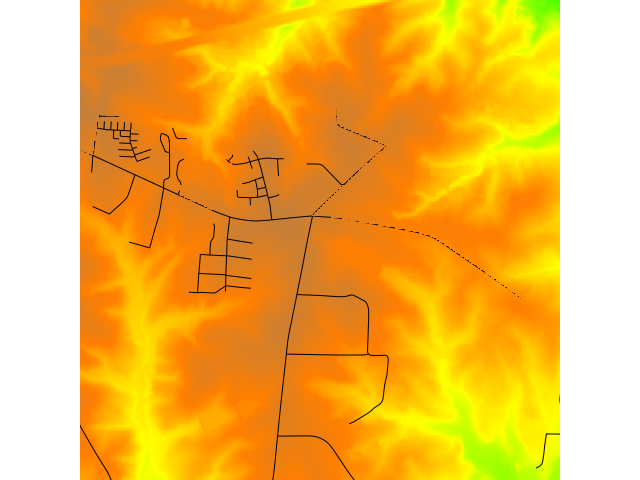

In [27]:
!d.rast elevation
!d.vect streets_wake
!r.mask raster=urban maskcats=55
!d.rast elevation
Image(filename="map.png")

Remove mask:

In [28]:
!r.mask -r

#### Zonal statistics

First, set the computational region:

In [29]:
!g.region raster=urban2_30m

Then, compute % area for each category in each zipcode.
Which zipcode has the most high density development?

In [30]:
!r.stats -pl zipcodes,urban2_30m

   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
27511 CARY 1  0.59%
27511 CARY 2  0.39%
27511 CARY * no data 4.23%
27513 CARY 1  0.06%
27513 CARY 2  0.10%
27513 CARY * no data 0.85%
27518 CARY 1  0.43%
27518 CARY 2  0.10%
27518 CARY * no data 6.10%
27529 GARNER 1  1.66%
27529 GARNER 2  1.37%
27529 GARNER * no data 3.85%
27539 APEX 2  0.01%
27539 APEX * no data 1.21%
27601 RALEIGH 1  1.34%
27601 RALEIGH 2  0.82%
27601 RALEIGH * no data 0.09%
27603 RALEIGH 1  4.00%
27603 RALEIGH 2  1.85%
27603 RALEIGH * no data 15.34%
27604 RALEIGH 1  0.81%
27604 RALEIGH 2  0.86%
27604 RALEIGH * no data 0.66%
27605 RALEIGH 1  0.44%
27605 RALEIGH 2  0.49%
27605 RALEIGH * no data 0.24%
27606 RALEIGH 1  1.64%


#### Working with relative coordinates
Enter the expression on a single line without \
Again, it is a good idea to remove the previously used map layers
before we start to work on a new task.

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      30
ewres:      30
rows:       450
cols:       500
cells:      225000
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


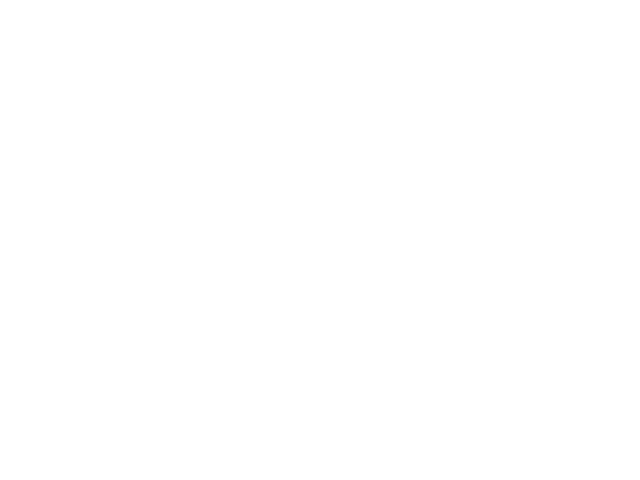

In [31]:
!g.region raster=elev_srtm_30m -p
!d.erase
!r.mapcalc "elev_srtm30m_smooth = (elev_srtm_30m[-1,-1]   \
           + elev_srtm_30m[-1,0] + elev_srtm_30m[-1,1] \
           + elev_srtm_30m[0,-1] + elev_srtm_30m[0,0]  \
           + elev_srtm_30m[0,1]  + elev_srtm_30m[1,-1] \
           + elev_srtm_30m[1,0]  + elev_srtm_30m[1,1])/9."
Image(filename="map.png")

Assign the resulting map the same color table as the original.
Compare global statistics

Color table for raster map <elev_srtm30m_smooth> set to 'elev_srtm_30m'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
total null and non-null cells: 225000
total null cells: 0

Of the non-null cells:
----------------------
n: 225000
minimum: -32.6544
maximum: 189.818
range: 222.472
mean: 113.498
mean of absolute values: 113.534
standard deviation: 23.7183
variance: 562.558
variation coefficient: 20.8975 %
sum: 25537115.624415
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
total null and non-null cells: 225000
total null cells: 1896

Of the non-null cells:
----------------------
n: 223104
minimum: -10.1891
maximum: 161.312
range: 171.501
mean: 113.531
mean of absolute values: 113.537
standard deviation: 23.3922
variance: 547.194
variation coefficient: 20.6042 %
sum: 25329229.8749284
   0   3   6   9  

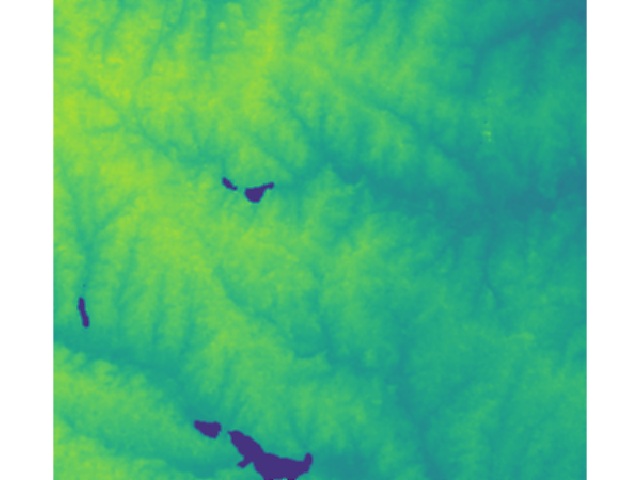

In [32]:
!r.colors elev_srtm30m_smooth raster=elev_srtm_30m
!r.univar elev_srtm_30m
!r.univar elev_srtm30m_smooth
!d.rast elev_srtm_30m
!d.rast elev_srtm30m_smooth
Image(filename="map.png")

In [33]:
# end the GRASS session
os.remove(rcfile)